In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from src import get_config, plot_autocorrelation

config = get_config()
stations_timeseries = pd.read_csv(
    config.processed_data_path / "stations_timeseries.csv",
    index_col=0,
    parse_dates=True,
)
# Convert columns to string
stations_timeseries.columns = stations_timeseries.columns.astype(str)

In [2]:
stations_timeseries[str(config.target_station_id)]

timestamps
2022-01-01 00:13:20.603583    19
2022-01-01 01:13:21.911079    19
2022-01-01 02:13:23.718951    19
2022-01-01 03:13:23.902654    18
2022-01-01 04:13:26.826536    18
                              ..
2022-12-31 19:57:50.302819     8
2022-12-31 20:57:50.382304     4
2022-12-31 21:57:52.761035     3
2022-12-31 22:57:53.608384     3
2022-12-31 23:57:54.886111     3
Name: 90, Length: 8738, dtype: int64

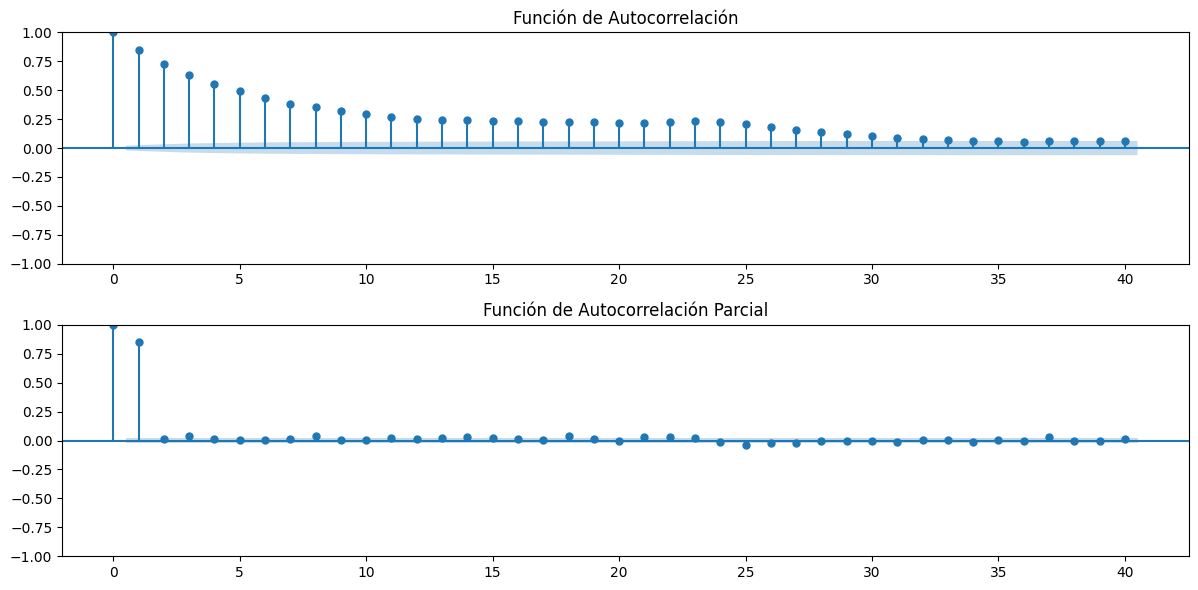

In [3]:
target_serie = stations_timeseries[str(config.target_station_id)]
plot_autocorrelation(
    stations_timeseries[str(config.target_station_id)],
)

<Axes: xlabel='timestamps'>

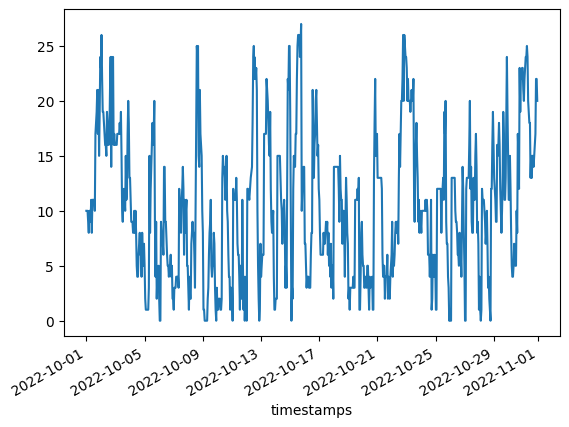

In [4]:
target_serie.loc["2022-10"].plot()

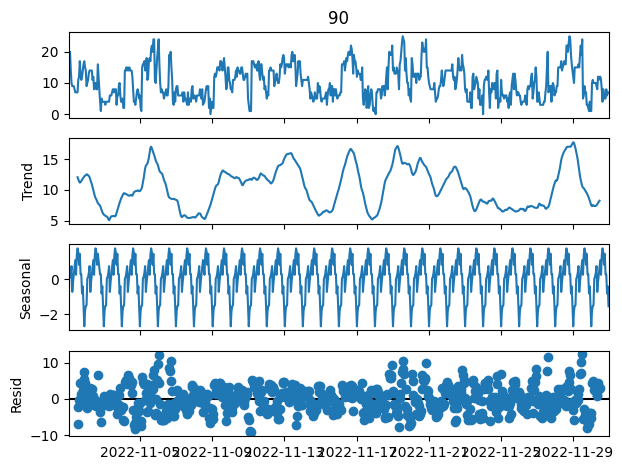

In [5]:
decomposition = seasonal_decompose(
    target_serie.loc["2022-11"], model="additive", period=24
)
decomposition.plot()
plt.show()

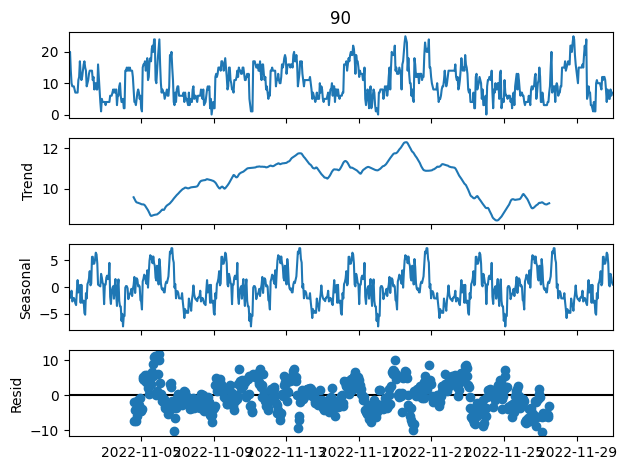

In [6]:
decomposition = seasonal_decompose(
    target_serie.loc["2022-11"], model="additive", period=24 * 7
)
decomposition.plot()
plt.show()

In [7]:
def aggregate_by_hour(series: pd.Series):
    # Ensuring the index is a DateTimeIndex
    series.index = pd.to_datetime(series.index)

    # Resampling and calculating the mean
    hourly_data = series.resample("H").mean()

    return hourly_data

In [8]:
target_serie.resample("H").mean()

timestamps
2022-01-01 00:00:00    19.0
2022-01-01 01:00:00    19.0
2022-01-01 02:00:00    19.0
2022-01-01 03:00:00    18.0
2022-01-01 04:00:00    18.0
                       ... 
2022-12-31 19:00:00     8.0
2022-12-31 20:00:00     4.0
2022-12-31 21:00:00     3.0
2022-12-31 22:00:00     3.0
2022-12-31 23:00:00     3.0
Freq: H, Name: 90, Length: 8760, dtype: float64

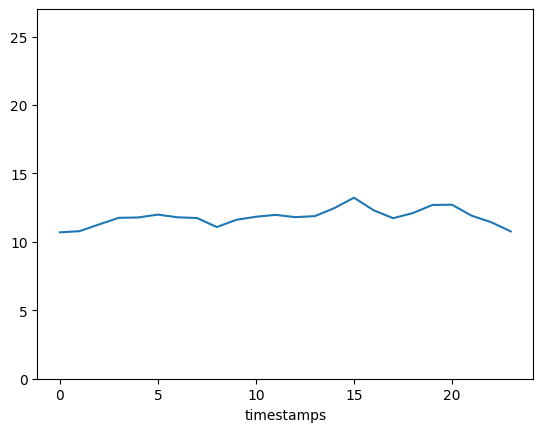

In [9]:
grouped = (
    target_serie.resample("H")
    .mean()
    .groupby(target_serie.resample("H").mean().index.hour)
    .mean()
    .plot()
)
plt.ylim(0, 27)
plt.show()

In [10]:
target_serie.groupby(target_serie.index.hour).mean()

timestamps
0     10.704110
1     10.815934
2     11.270718
3     11.736264
4     11.796143
5     11.988920
6     11.762431
7     11.731507
8     11.055096
9     11.607143
10    11.834711
11    11.964481
12    11.851648
13    11.930939
14    12.493151
15    13.221918
16    12.359673
17    11.702479
18    12.128767
19    12.695890
20    12.710383
21    11.909341
22    11.434066
23    10.773224
Name: 90, dtype: float64

<Axes: xlabel='timestamps,timestamps'>

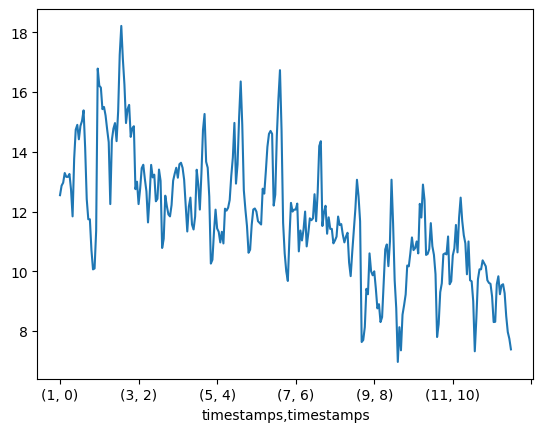

In [11]:
target_serie.groupby([target_serie.index.month, target_serie.index.hour]).mean().plot()

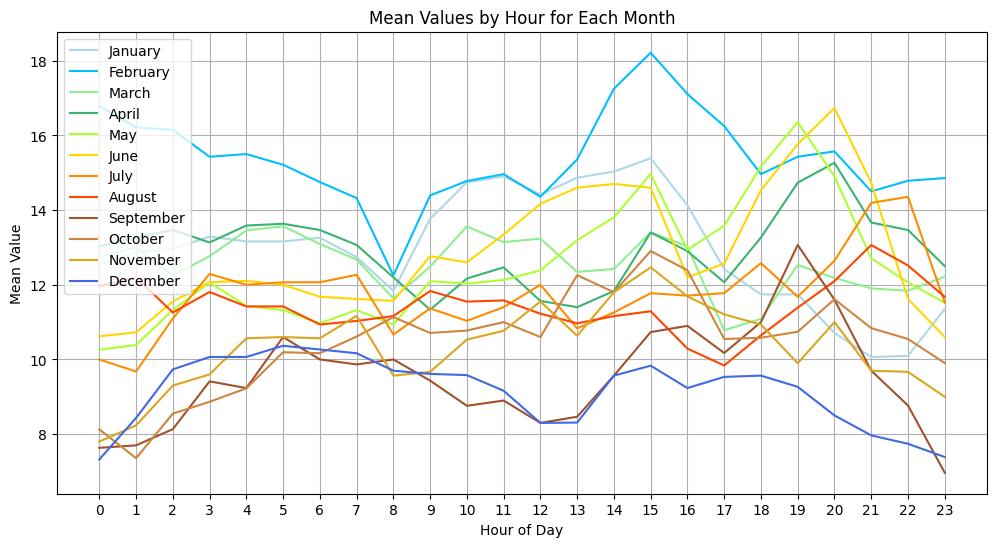

In [12]:
monthly_hourly_means = target_serie.groupby(
    [target_serie.index.month, target_serie.index.hour]
).mean()

# Setting up the plot
plt.figure(figsize=(12, 6))

# Extracting unique months
months = monthly_hourly_means.index.get_level_values(0).unique()

# Month names for labels
month_names = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
seasonal_colors = {
    1: "lightblue",  # January (Winter)
    2: "deepskyblue",  # February (Winter)
    3: "lightgreen",  # March (Spring)
    4: "mediumseagreen",  # April (Spring)
    5: "greenyellow",  # May (Spring)
    6: "gold",  # June (Summer)
    7: "darkorange",  # July (Summer)
    8: "orangered",  # August (Summer)
    9: "sienna",  # September (Autumn)
    10: "peru",  # October (Autumn)
    11: "goldenrod",  # November (Autumn)
    12: "royalblue",  # December (Winter)
}

for i, month in enumerate(months):
    # Selecting data for the month
    monthly_data = monthly_hourly_means.xs(month, level=0)
    plt.plot(
        monthly_data.index,
        monthly_data.values,
        label=month_names[month - 1],
        color=seasonal_colors[month],
    )

plt.xlabel("Hour of Day")
plt.ylabel("Mean Value")
plt.title("Mean Values by Hour for Each Month")
plt.xticks(range(0, 24))  # Setting x-ticks to be every hour
plt.legend()
plt.grid(True)
plt.show()

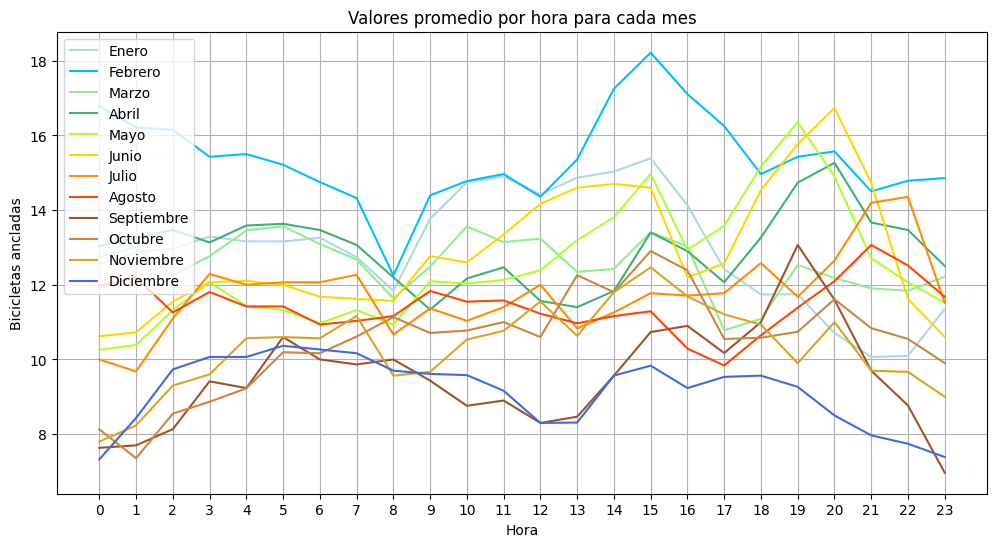

In [13]:
from src import plot_mean_values_by_hour_for_each_month

plot_mean_values_by_hour_for_each_month(target_serie)

In [14]:
len(target_serie)

8738

In [16]:
len(target_serie.resample("H").mean())

8760

In [21]:
resampled = target_serie.resample("H").mean()

# Count nan by month
resampled.isna().groupby(resampled.index.month).sum()

timestamps
1      4
2      4
3      6
4      1
5      3
6     11
7      9
8      1
9      3
10     7
11     3
12    19
Name: 90, dtype: int64

In [22]:
resampled[resampled.isna()].loc["2022-6"]

timestamps
2022-06-17 22:00:00   NaN
2022-06-20 00:00:00   NaN
2022-06-20 01:00:00   NaN
2022-06-20 02:00:00   NaN
2022-06-20 03:00:00   NaN
2022-06-20 04:00:00   NaN
2022-06-20 05:00:00   NaN
2022-06-20 06:00:00   NaN
2022-06-20 07:00:00   NaN
2022-06-21 11:00:00   NaN
2022-06-25 06:00:00   NaN
Name: 90, dtype: float64